In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import itertools
import os
from scipy.stats import normaltest
from itertools import groupby
import datetime
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
def read_df(df_to_read):

    with open(df_to_read, 'rb') as f:
        df = pickle.load(f)

    return df

In [4]:
storage_path = r"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/"
intensity_model_path = storage_path + r"15-12-2022-actin_intensity local dens-False, s%s, s%s train [130, 160] diff window win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/" % (1,5)
motility_model_path = storage_path + r"15-12-2022-motility local dens-False, s%s, s%s train [130, 160] diff window/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/" % (1,5)

s2_path_actin_intensity= intensity_model_path + 'df_score_vid_num_S2.pkl'
s2_path_motility=motility_model_path + 'df_score_vid_num_S2.pkl'

s3_path_actin_intensity=intensity_model_path + 'df_score_vid_num_S3.pkl'
s3_path_motility= motility_model_path + 'df_score_vid_num_S3.pkl'

s6_path_actin_intensity= intensity_model_path + 'df_score_vid_num_S6.pkl'
s6_path_motility=motility_model_path + 'df_score_vid_num_S6.pkl'

s8_path_actin_intensity=intensity_model_path + 'df_score_vid_num_S8.pkl'
s8_path_motility= motility_model_path + 'df_score_vid_num_S8.pkl'

dictoni_score = {'s6_path_actin_intensity': s6_path_actin_intensity,
               's8_path_actin_intensity': s8_path_actin_intensity,
                's2_path_actin_intensity': s2_path_actin_intensity,
                's3_path_actin_intensity': s3_path_actin_intensity,
                's6_path_motility': s6_path_motility, 
                's8_path_motility': s8_path_motility,
                's2_path_motility': s2_path_motility,
                's3_path_motility': s3_path_motility,
               }


In [5]:
def preprocess_df(df):
    change_df = pd.DataFrame()
    for idx,grp in df.groupby('Spot track ID'):
        score_df = grp
        first_intensity_score = grp['score_intensity'].dropna().iloc[0]
        first_motility_score = grp['score_motility'].dropna().iloc[0]
        score_df['change_persistence'] = grp['persistence'].diff(periods=10)
        score_df['change_score_intensity'] = grp['score_intensity'].diff(periods=10)
        score_df['change_score_motility'] = grp['score_motility'].diff(periods=10)
        score_df['score_SMA_motility']= grp['score_motility'].rolling(5).mean()
        score_df['score_SMA_intensity']= grp['score_intensity'].rolling(5).mean()
        score_df['persistence_SMA']=grp['persistence'].rolling(5).mean()

       # Append the modified group data to change_df
        change_df = pd.concat([change_df, score_df], ignore_index=True)

    # pd.concat(change_df)
    return change_df

In [6]:
scores_df_s3 = read_df('properties_scores_df_S3.pkl')
new_df = preprocess_df(scores_df_s3)
new_df.head()

,score_motility,time,Spot frame,Spot track ID,score_intensity,Spot position X,Spot position Y,speed,mean,persistence,local density,change_persistence,change_score_intensity,change_score_motility,score_SMA_motility,score_SMA_intensity,persistence_SMA
0,NaN,1.916667,23,1,NaN,835.057373,1162.679565,NaN,226.003906,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.000000,24,1,NaN,838.671875,1158.896362,5.232327,224.750000,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.083333,25,1,NaN,843.192322,1160.707520,4.869777,316.326172,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.166667,26,1,NaN,845.664429,1161.416504,2.571764,390.664062,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2.250000,27,1,NaN,845.338318,1166.744629,5.338096,392.964844,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Extract the data for plotting
def plot_2_columns(df, y_col1, y_col2, x, title):

    df_col1, col1_color, col1_name = y_col1[0], y_col1[1], y_col1[2]
    df_col2, col2_color, col2_name = y_col2[0], y_col2[1], y_col2[2]

    time = df[x]


    # Plot 'score_motility' in red and 'persistence' in purple, with time on the x-axis
    plt.plot(time, df_col1, label=col1_name, color=col1_color)
    plt.plot(time, df_col2, label=col2_name, color=col2_color)

    # Add labels and a legend
    plt.xlabel(x)
    plt.ylabel('differentiation score')  # You can update the y-axis label accordingly
    plt.legend()

    # Show the plot
    plt.title(title)
    plt.savefig(f'{title}.eps', format='eps')

    plt.show()

In [21]:

def plot_score_models(cell_num):
    title = f'Score of Motility and Actin Intensity Over Time - ID {cell_num}'
    df_score_models = new_df[new_df['Spot track ID'] == cell_num]
    plot_2_columns(df_score_models, (df_score_models['score_SMA_motility'], 'yellow', 'motility'), (df_score_models['score_SMA_intensity'], 'red', 'intensity'), 'time', title)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


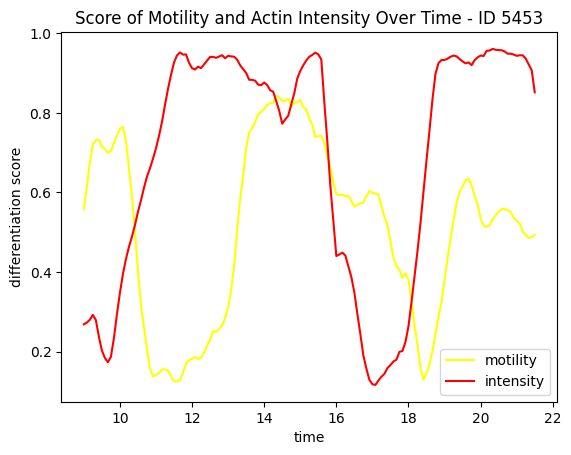

In [22]:
cell_num = 5453
plot_score_models(cell_num)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


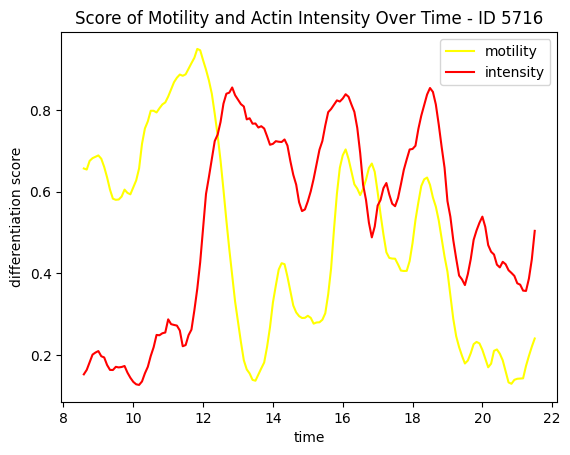

In [23]:
cell_num = 5716
plot_score_models(cell_num)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


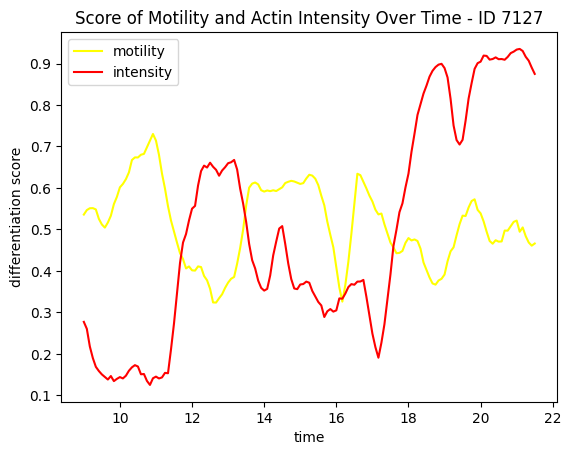

In [24]:
cell_num = 7127
plot_score_models(cell_num)
